In [111]:
from sklearn import tree
import csv
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [112]:
def is_empty_or_blank(msg):
    return re.search("^\s*$", msg)

In [113]:
columns = []
survived = []
data = []
data_indices = [2,4,5,6,7,9,11]
accuracy = [['Decision Tree', 0],['Naive Bayes',0],['Nueral Net',0],['K Nearest Neighbors',0]]
with open('train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            data_series = pd.Series(row)
            features = list(data_series[data_indices])
            columns = row
            line_count += 1
        else:
            data_series = pd.Series(row)
            data_row = list(data_series[data_indices])
            result = any([is_empty_or_blank(elem) for elem in data_row])
            if result == False:
                survived.append(row[1])
                data_row[1] = (1 if data_row[1] == 'male' else 0)
                if data_row[6] == 'C':
                    data_row[6] = 1
                elif data_row[6] == 'Q':
                    data_row[6] = 2
                else:
                    data_row[6] = 3
                data.append([float(i) for i in data_row])
X_train, X_test, y_train, y_test = train_test_split(data, survived, test_size=0.75, random_state=0)

Decision Tree Classification
Number of mislabeled points out of a total 534 points: 139
Accuracy: 0.739700


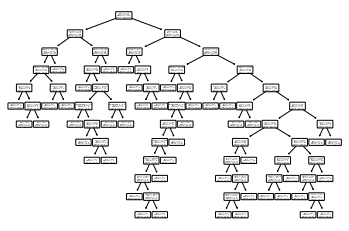

In [114]:
X, y = X_train, y_train
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X, y)
tree.plot_tree(clf_dt,feature_names=features,class_names=['perished','survived'],rounded=True);
predictions_dt = clf_dt.predict(X_test)
accuracy[0][1] = 1-(((y_test != predictions_dt).sum())/len(X_test))
print("Decision Tree Classification")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_dt).sum()))
print("Accuracy: %f" % (accuracy[0][1]))

In [115]:
nb_model = GaussianNB()
predictions_nb = nb_model.fit(X_train,y_train).predict(X_test)
accuracy[1][1] = 1-(((y_test != predictions_nb).sum())/len(X_test))
print("Gaussian Naive Bayes Classification")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_nb).sum()))
print("Accuracy: %f" % (accuracy[1][1]))

Gaussian Naive Bayes Classification
Number of mislabeled points out of a total 534 points: 112
Accuracy: 0.790262


In [116]:
X, y = X_train, y_train
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,3), random_state=2)
clf_nn = clf_nn.fit(X, y)
predictions_nn = clf_nn.predict(X_test)
accuracy[2][1] = 1-(((y_test != predictions_nn).sum())/len(X_test))
print("Nueral Net Classification")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_nn).sum()))
print("Accuracy: %f" % (accuracy[2][1]))

Nueral Net Classification
Number of mislabeled points out of a total 534 points: 98
Accuracy: 0.816479


In [117]:
X, y = X_train, y_train
clf_knn = KNeighborsClassifier(n_neighbors=6);
clf_knn.fit(X, y)
predictions_knn = clf_knn.predict(X_test)
accuracy[3][1] = 1-(((y_test != predictions_knn).sum())/len(X_test))
print("Nueral Net Classification")
print("Number of mislabeled points out of a total %d points: %d" % (len(X_test), (y_test != predictions_knn).sum()))
print("Accuracy: %f" % (accuracy[3][1]))

Nueral Net Classification
Number of mislabeled points out of a total 534 points: 184
Accuracy: 0.655431


In [118]:
max = [0,0]
print("Accuracy Summary")
for i in accuracy:
    print("%s: %f" % (i[0],i[1]))
    if i[1] > max[1]:
        max = i

print("\nThe best classifier was %s with an accuracy of: %f" % (max[0],max[1]))

Accuracy Summary
Decision Tree: 0
Naive Bayes: 0
Nueral Net: 0
K Nearest Neighbors: 0

The best classifier was Nueral Net with an accuracy of: 0
